In [38]:
import pandas as pd

TheftData=pd.read_csv("D:\ElectricityTheft\dataset\TunedElectricityDataset.csv")
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = TheftData.iloc[:, 3:1036].astype('float32' )
y = TheftData.iloc[:, 1]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


C:\Users\saqib\anaconda3\envs\TF\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\saqib\anaconda3\envs\TF\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


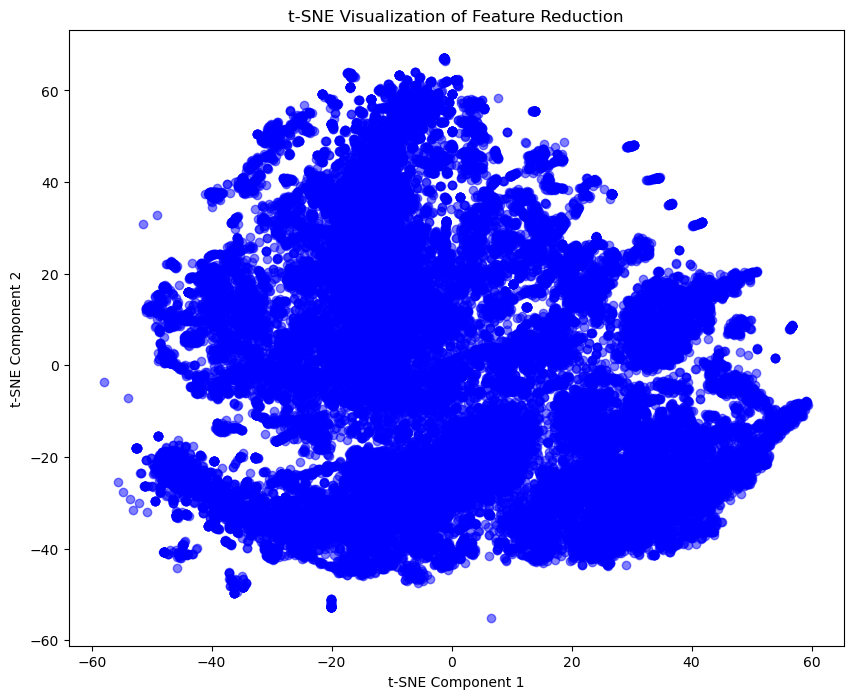

In [39]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming X is your high-dimensional feature matrix with shape (n_samples, n_features)

# Initialize t-SNE with desired parameters
tsne = TSNE(n_components=2, random_state=42)  # You can adjust the number of components as needed

# Fit and transform the data
X_tsne = tsne.fit_transform(X_scaled)

# Visualize the reduced data
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], marker='o', color='b', alpha=0.5)
plt.title('t-SNE Visualization of Feature Reduction')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


In [40]:
X_tsne

array([[ 18.044128 , -24.907131 ],
       [-47.4971   , -21.414753 ],
       [  2.046543 , -24.493744 ],
       ...,
       [ -4.4176974,  43.981026 ],
       [ 40.06728  , -35.405907 ],
       [ -8.476751 , -20.247517 ]], dtype=float32)

In [41]:
X_tsne.shape

(42372, 2)

In [43]:
y

0        1
1        1
2        1
3        1
4        1
        ..
42367    0
42368    0
42369    0
42370    0
42371    0
Name: FLAG, Length: 42372, dtype: int64

In [42]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_tsne)


In [44]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)


from sklearn.preprocessing import OneHotEncoder
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = y.reshape(len(y), 1)
y = onehot_encoder.fit_transform(integer_encoded)
print(y)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [45]:
y.shape

(42372, 2)

In [46]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_trainNormal, X_testNormal, y_trainNormal, y_testNormal = train_test_split(X_scaled, y, test_size = 0.25, random_state = 20)



In [47]:
X_trainNormal.shape

(31779, 2)

In [48]:
y_trainNormal.shape

(31779, 2)

In [49]:
X_testNormal.shape

(10593, 2)

In [79]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential()

# Add input layer
model.add(layers.Input(shape=(2,)))

# Add hidden layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))  # Adding dropout for regularization
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu'))

# Add output layer
model.add(layers.Dense(2, activation='softmax'))  # Adjust activation based on your task (e.g., 'softmax' for multi-class classification)

# Compile the model


# Print model summary


In [80]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               1536      
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 2)                 258       
                                                                 
Total params: 166,018
Trainable params: 166,018
Non-tr

In [81]:
from keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(X_trainNormal, y_trainNormal,validation_split=0.25, batch_size = 256, epochs = 5)

C:\Users\saqib\anaconda3\envs\TF\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/5
94/94 [==============================] - 6s 20ms/step - loss: 0.6394 - accuracy: 0.7790 - val_loss: 0.5547 - val_accuracy: 0.9166
Epoch 2/5
94/94 [==============================] - 1s 7ms/step - loss: 0.4963 - accuracy: 0.9152 - val_loss: 0.4311 - val_accuracy: 0.9166
Epoch 3/5
94/94 [==============================] - 1s 6ms/step - loss: 0.3924 - accuracy: 0.9152 - val_loss: 0.3503 - val_accuracy: 0.9166
Epoch 4/5
94/94 [==============================] - 1s 6ms/step - loss: 0.3325 - accuracy: 0.9152 - val_loss: 0.3106 - val_accuracy: 0.9166
Epoch 5/5
94/94 [==============================] - 1s 7ms/step - loss: 0.3066 - accuracy: 0.9152 - val_loss: 0.2950 - val_accuracy: 0.9166


In [82]:
history.history['accuracy']

[0.7789711952209473,
 0.9152471423149109,
 0.9152471423149109,
 0.9152471423149109,
 0.9152471423149109]

In [83]:
history.history['val_accuracy']

[0.9165512919425964,
 0.9165512919425964,
 0.9165512919425964,
 0.9165512919425964,
 0.9165512919425964]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


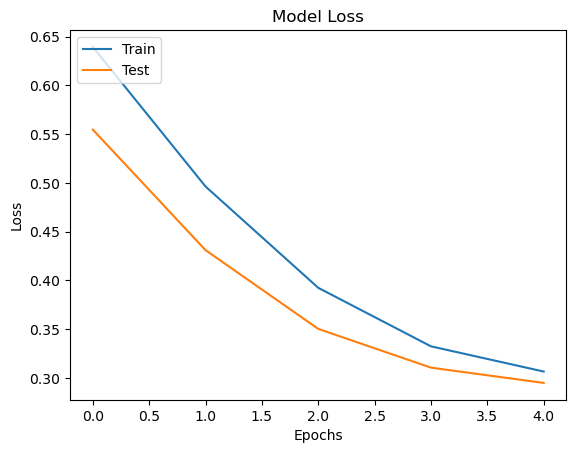

In [84]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend([ 'Train' , 'Test' ], loc= 'upper left' )
plt.show()

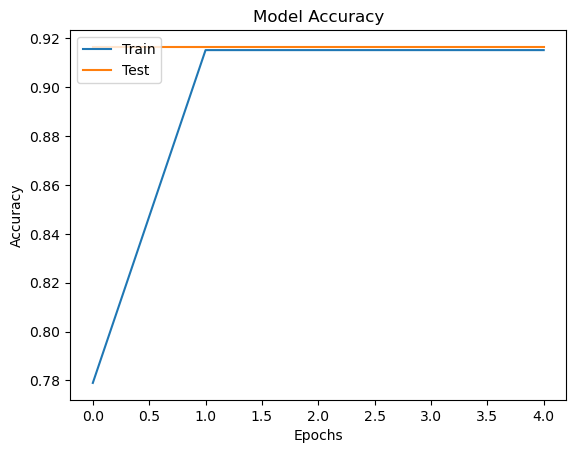

In [85]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend([ 'Train' , 'Test' ], loc= 'upper left' )
plt.show()

In [86]:
y_pred = model.predict(X_testNormal)

332/332 [==============================] - 1s 2ms/step


In [87]:
for y in y_pred:
    print(y)
    print("==============")

[0.9852825  0.01471746]
[0.9720726 0.0279274]
[0.98227656 0.01772333]
[0.98719907 0.01280088]
[0.97993374 0.02006629]
[0.9939903 0.0060096]
[0.98865086 0.01134909]
[0.98698604 0.01301395]
[0.97887677 0.02112325]
[0.99134797 0.00865207]
[0.9777616  0.02223843]
[0.9832272  0.01677286]
[0.99263775 0.00736229]
[0.96884733 0.03115267]
[0.9818615  0.01813857]
[0.9689706  0.03102936]
[0.9904441  0.00955591]
[0.9653288  0.03467124]
[0.96718615 0.03281394]
[0.98900217 0.01099776]
[0.9849517  0.01504829]
[0.9853512  0.01464884]
[0.9884604  0.01153959]
[0.9809996  0.01900042]
[0.9848992  0.01510079]
[0.98008037 0.01991961]
[0.9857894  0.01421055]
[0.9709879  0.02901217]
[0.9738938  0.02610607]
[0.9778781  0.02212186]
[0.990986   0.00901403]
[0.9833327  0.01666729]
[0.9776705  0.02232952]
[0.9922989  0.00770113]
[0.9761961  0.02380376]
[0.9851379  0.01486213]
[0.98884606 0.01115388]
[0.9900193  0.00998066]
[0.9752165 0.0247834]
[0.9746244  0.02537563]
[0.9842811 0.0157188]
[0.98305124 0.01694869]


[0.9823722  0.01762778]
[0.98140603 0.018594  ]
[0.97634524 0.02365479]
[0.98075    0.01924983]
[0.97491187 0.0250881 ]
[0.9931647  0.00683524]
[0.97376174 0.02623829]
[0.99319077 0.00680912]
[0.9519607  0.04803933]
[0.98934823 0.01065173]
[0.96883506 0.03116497]
[0.9854441  0.01455585]
[0.9765014  0.02349862]
[0.9765501  0.02344989]
[0.97494805 0.02505195]
[0.9908816  0.00911837]
[0.975734   0.02426599]
[0.9632397 0.0367603]
[0.97794175 0.02205828]
[0.9886663  0.01133377]
[0.9931466  0.00685342]
[0.9890204  0.01097963]
[0.9884893  0.01151068]
[0.9665105  0.03348947]
[0.9777247  0.02227526]
[0.97798437 0.02201563]
[0.97472763 0.02527231]
[0.9800407  0.01995919]
[0.97769755 0.02230247]
[0.9686165  0.03138356]
[0.9758683  0.02413173]
[0.9614779  0.03852209]
[0.98643535 0.01356466]
[0.9601716  0.03982838]
[0.9649446  0.03505543]
[0.96504456 0.03495532]
[0.9811116  0.01888845]
[0.9715464  0.02845353]
[0.95256704 0.04743287]
[0.9901902  0.00980975]
[0.9760529  0.02394712]
[0.95316774 0.0468

[0.9654485  0.03455143]
[0.98786163 0.01213835]
[0.96744466 0.03255523]
[0.98933244 0.01066753]
[0.9864495  0.01355052]
[0.9863794  0.01362063]
[0.98714024 0.01285973]
[0.98880374 0.01119618]
[0.9789699  0.02103009]
[0.97879314 0.02120688]
[0.96820045 0.03179957]
[0.98707575 0.01292426]
[0.9851986  0.01480135]
[0.99245816 0.00754183]
[0.9919466  0.00805337]
[0.9836974  0.01630253]
[0.98806566 0.01193434]
[0.9716814  0.02831864]
[0.9585423  0.04145771]
[0.986564   0.01343594]
[0.9741701 0.0258299]
[0.98849446 0.01150549]
[0.986262   0.01373798]
[0.97350794 0.02649206]
[0.9900473  0.00995278]
[0.9768047  0.02319529]
[0.98058206 0.01941792]
[0.98846596 0.01153403]
[0.97474796 0.02525201]
[0.9879226  0.01207725]
[0.9806682  0.01933174]
[0.9883193  0.01168071]
[0.9691455 0.0308546]
[0.9756774  0.02432263]
[0.9838222  0.01617778]
[0.99156344 0.00843649]
[0.97519946 0.02480056]
[0.9820011  0.01799892]
[0.9817659  0.01823399]
[0.9851514  0.01484858]
[0.99129254 0.00870746]
[0.97328395 0.026716

[0.9637089  0.03629108]
[0.98091525 0.01908468]
[0.9684641 0.0315359]
[0.9902185  0.00978153]
[0.9893309  0.01066908]
[0.98812515 0.01187496]
[0.97034687 0.02965306]
[0.9897415  0.01025847]
[0.98080873 0.01919127]
[0.97134554 0.02865452]
[0.96752113 0.03247879]
[0.98936117 0.01063875]
[0.9691977  0.03080231]
[0.9889083  0.01109162]
[0.990638 0.009362]
[0.98061734 0.01938261]
[0.9923611  0.00763887]
[0.97612154 0.02387848]
[0.9798067  0.02019331]
[0.9753285  0.02467138]
[0.9740546  0.02594541]
[0.97918665 0.02081336]
[0.98727936 0.01272062]
[0.9891882  0.01081173]
[0.98303527 0.01696464]
[0.99269193 0.007308  ]
[0.97623605 0.02376394]
[0.9902173  0.00978258]
[0.97397596 0.02602394]
[0.9841549  0.01584509]
[0.96040434 0.03959565]
[0.97635347 0.02364649]
[0.9879265  0.01207348]
[0.96798867 0.03201125]
[0.98999983 0.01000016]
[0.9875211  0.01247882]
[0.97099835 0.0290016 ]
[0.9836367  0.01636331]
[0.9788575  0.02114251]
[0.9682952 0.0317048]
[0.96006566 0.03993441]
[0.96824527 0.03175468]


[0.9896416  0.01035837]
[0.9868783  0.01312165]
[0.97649944 0.02350057]
[0.9674817  0.03251829]
[0.9846225  0.01537744]
[0.9887743  0.01122569]
[0.9882463  0.01175362]
[0.9651258  0.03487409]
[0.9730575  0.02694249]
[0.96718705 0.03281289]
[0.9865904  0.01340959]
[0.98641914 0.01358083]
[0.97614866 0.02385133]
[0.9843933  0.01560665]
[0.9885522  0.01144782]
[0.97682863 0.02317139]
[0.9831301  0.01686982]
[0.9877769 0.0122232]
[0.9790108  0.02098907]
[0.9800563  0.01994381]
[0.97832525 0.0216747 ]
[0.988886   0.01111391]
[0.9711222  0.02887777]
[0.9599415  0.04005852]
[0.97971517 0.02028491]
[0.9902532  0.00974684]
[0.9785822  0.02141787]
[0.9714249  0.02857503]
[0.9914521  0.00854787]
[0.97381365 0.02618638]
[0.98163176 0.01836835]
[0.97718835 0.02281164]
[0.98950416 0.01049575]
[0.98957705 0.01042293]
[0.9787745  0.02122559]
[0.9798452  0.02015461]
[0.9672816  0.03271831]
[0.98353887 0.01646115]
[0.9745195  0.02548049]
[0.96908194 0.03091801]
[0.9775722  0.02242778]
[0.9835762  0.0164

[0.98019344 0.01980645]
[0.96625364 0.03374638]
[0.99076945 0.0092305 ]
[0.976175   0.02382486]
[0.97230124 0.02769877]
[0.9892296  0.01077031]
[0.9842689  0.01573109]
[0.985089   0.01491087]
[0.98336655 0.01663344]
[0.9770301  0.02296987]
[0.9897215  0.01027857]
[0.984686   0.01531395]
[0.98442125 0.0155787 ]
[0.9853287  0.01467137]
[0.9835574  0.01644253]
[0.99198097 0.00801905]
[0.9844603  0.01553965]
[0.96933323 0.03066676]
[0.98089534 0.01910458]
[0.9758056  0.02419451]
[0.9720228  0.02797719]
[0.9885335  0.01146648]
[0.97530234 0.02469764]
[0.98649323 0.01350672]
[0.98443687 0.01556309]
[0.9734211  0.02657884]
[0.98717743 0.01282259]
[0.9896726  0.01032733]
[0.9777449  0.02225518]
[0.9628133  0.03718664]
[0.9841808  0.01581921]
[0.9765353  0.02346471]
[0.96282905 0.0371709 ]
[0.98238665 0.01761328]
[0.9881573 0.0118427]
[0.98410887 0.01589101]
[0.96971714 0.03028289]
[0.98892725 0.01107264]
[0.9840399  0.01596018]
[0.9594761 0.040524 ]
[0.9848943  0.01510574]
[0.9796152  0.020384

[0.9820147  0.01798534]
[0.9672871  0.03271276]
[0.97494245 0.02505754]
[0.9812663 0.0187336]
[0.9815654  0.01843467]
[0.9645461  0.03545397]
[0.983835   0.01616498]
[0.9733397  0.02666029]
[0.9854864  0.01451364]
[0.96526194 0.03473803]
[0.9768782  0.02312177]
[0.9574055  0.04259453]
[0.98320454 0.01679544]
[0.96510947 0.03489044]
[0.9928684  0.00713165]
[0.98603714 0.0139628 ]
[0.98408    0.01591997]
[0.98743165 0.01256821]
[0.98437744 0.01562251]
[0.9772417  0.02275833]
[0.98944485 0.01055525]
[0.98344344 0.01655646]
[0.98198575 0.01801418]
[0.97189397 0.02810603]
[0.95840037 0.04159958]
[0.9822006  0.01779946]
[0.9781753 0.0218247]
[0.9941413  0.00585866]
[0.9578076  0.04219231]
[0.98990303 0.01009687]
[0.972573   0.02742696]
[0.9855384 0.0144615]
[0.97457725 0.02542283]
[0.97022206 0.02977791]
[0.9797477  0.02025225]
[0.9802269  0.01977312]
[0.9718963  0.02810369]
[0.97906035 0.02093966]
[0.9824561  0.01754396]
[0.9884381 0.0115618]
[0.95252496 0.04747497]
[0.9841475  0.01585241]


In [88]:
predicted = []
for y in y_pred:
    max_index = y.tolist().index(max(y))
    predicted.append(max_index)

# Find the index of the maximum number




In [89]:
actual = []
for y in y_testNormal:
    max_index = y.tolist().index(max(y))
    actual.append(max_index)

In [90]:
predicted

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [91]:
actual

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,


In [92]:
from sklearn.metrics import confusion_matrix
confusion_matrix(actual,predicted)

array([[9661,    0],
       [ 932,    0]], dtype=int64)

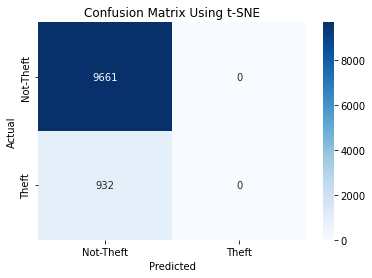

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
TP = 9661
FP = 0
TN = 0
FN = 932

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap([[TP, FP], [FN, TN]], annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not-Theft', 'Theft'], yticklabels=['Not-Theft', 'Theft'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Using t-SNE')
plt.show()

In [93]:
from sklearn.metrics import classification_report
print(classification_report(actual,predicted))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      9661
           1       0.00      0.00      0.00       932

    accuracy                           0.91     10593
   macro avg       0.46      0.50      0.48     10593
weighted avg       0.83      0.91      0.87     10593



C:\Users\saqib\anaconda3\envs\TF\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saqib\anaconda3\envs\TF\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saqib\anaconda3\envs\TF\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
cm=classification_report(actual,predicted)

C:\Users\saqib\anaconda3\envs\TF\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saqib\anaconda3\envs\TF\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saqib\anaconda3\envs\TF\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


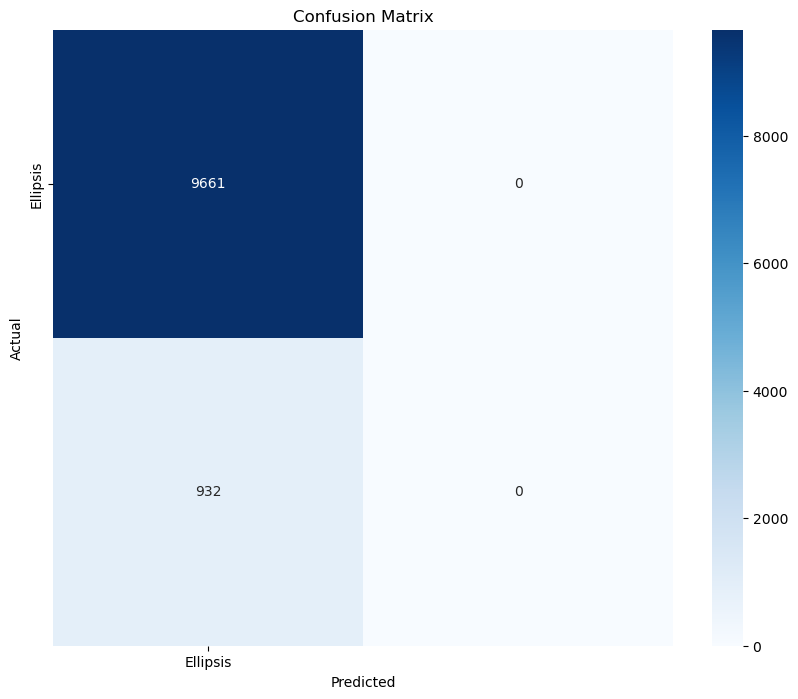

In [95]:
import seaborn as sns
cm = confusion_matrix(actual, predicted)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[...], yticklabels=[...])  # Replace [...] with your class labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

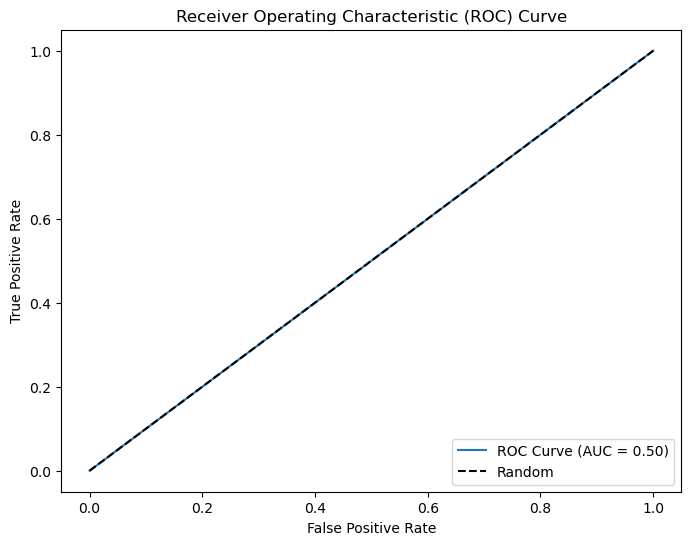

In [96]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(actual, predicted)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [97]:
df = pd.DataFrame(X_testNormal).head(10)
#df = pd.DataFrame(X_testNormal)
df.to_csv("D:\ElectricityTheft\\tsne\\tsneXtest.csv")

In [98]:
df = pd.DataFrame(X_trainNormal).head(10)
df.to_csv("D:\ElectricityTheft\\tsne\\tsneXtrain.csv")

In [99]:
one_d_array = y_pred.flatten()

In [100]:
val1=[]
val2=[]
for y in y_pred:
    print(y[0])
    print(y[1])
    print("====")
    val1.append(y[0])
    val2.append(y[1])


0.9852825
0.014717463
====
0.9720726
0.027927397
====
0.98227656
0.017723326
====
0.98719907
0.012800879
====
0.97993374
0.020066293
====
0.9939903
0.0060096025
====
0.98865086
0.011349086
====
0.98698604
0.013013947
====
0.97887677
0.021123251
====
0.99134797
0.008652068
====
0.9777616
0.022238433
====
0.9832272
0.016772857
====
0.99263775
0.0073622917
====
0.96884733
0.031152666
====
0.9818615
0.018138567
====
0.9689706
0.03102936
====
0.9904441
0.009555906
====
0.9653288
0.034671236
====
0.96718615
0.032813936
====
0.98900217
0.010997755
====
0.9849517
0.01504829
====
0.9853512
0.014648837
====
0.9884604
0.011539588
====
0.9809996
0.019000417
====
0.9848992
0.015100794
====
0.98008037
0.019919613
====
0.9857894
0.014210551
====
0.9709879
0.02901217
====
0.9738938
0.026106069
====
0.9778781
0.022121858
====
0.990986
0.009014033
====
0.9833327
0.01666729
====
0.9776705
0.022329517
====
0.9922989
0.007701126
====
0.9761961
0.023803765
====
0.9851379
0.014862134
====
0.98884606
0.011153

In [101]:
actual

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,


In [102]:
df = pd.DataFrame({'Actual': actual, 'Softmax Predicted Value 1': val1, 'Softmax Predicted Value 2': val2, 'Predicted Result': predicted})
df.to_excel("D:\ElectricityTheft\\tsne\\tsneActualPredicted.xlsx")

In [103]:
df = pd.DataFrame({'Training Accuracy': history.history['accuracy'], 'Test Accuracy': history.history['val_accuracy']})
df.to_excel("D:\ElectricityTheft\\tsne\\tsneAccuracies.xlsx")